In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 Keras UNet ***
Working directory: /tmp/tmp41y7chokGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_masks.npy')

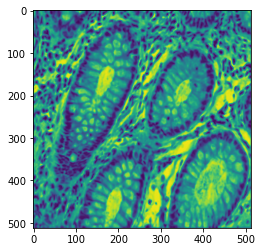

In [5]:
imshow(images[0])

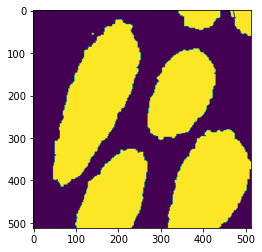

In [6]:
imshow(masks[0])

In [7]:
images.shape

(2180, 512, 512, 1)

In [8]:
masks.shape

(2180, 512, 512, 1)

In [9]:
R.run(images=images, masks=masks, runs=10, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 18s 7s/step - loss: 0.9163 - dice_coeff: 0.5756 - val_loss: 0.6826 - val_dice_coeff: 0.6030
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.8999 - dice_coeff: 0.5771 - val_loss: 0.6859 - val_dice_coeff: 0.5985
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.8726 - dice_coeff: 0.5806 - val_loss: 0.6888 - val_dice_coeff: 0.5943
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.8472 - dice_coeff: 0.5901 - val_loss: 0.6911 - val_dice_coeff: 0.5908
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.8437 - dice_coeff: 0.5887 - val_loss: 0.6930 - val_dice_coeff: 0.5877
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.8371 - dice_coeff: 0.5896 - val_loss: 0.6948 - val_dice_coeff: 0.5848
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.8260 - dice_coeff: 0.5936 - 

3/3 [==============================] - 2s 880ms/step - loss: 0.5455 - dice_coeff: 0.7033 - val_loss: 0.5849 - val_dice_coeff: 0.7136
Epoch 7/100
3/3 [==============================] - 2s 861ms/step - loss: 0.5402 - dice_coeff: 0.7048 - val_loss: 0.5932 - val_dice_coeff: 0.7212
Epoch 8/100
3/3 [==============================] - 2s 876ms/step - loss: 0.5492 - dice_coeff: 0.7030 - val_loss: 0.5929 - val_dice_coeff: 0.7227
Epoch 9/100
3/3 [==============================] - 2s 885ms/step - loss: 0.5328 - dice_coeff: 0.7115 - val_loss: 0.5851 - val_dice_coeff: 0.7211
Epoch 10/100
3/3 [==============================] - 2s 891ms/step - loss: 0.5331 - dice_coeff: 0.7117 - val_loss: 0.5809 - val_dice_coeff: 0.7202
Epoch 11/100
3/3 [==============================] - 2s 917ms/step - loss: 0.5313 - dice_coeff: 0.7124 - val_loss: 0.5744 - val_dice_coeff: 0.7166
Epoch 12/100
3/3 [==============================] - 2s 869ms/step - loss: 0.5169 - dice_coeff: 0.7191 - val_loss: 0.5880 - val_dice_coeff: 0

Testing the discriminator...
5/5 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Replacing 22 from 68 !
D_relabeled_ 22
point ids 22
Removed: 22 Filled: 22
TOOK 54.45668339729309 seconds
==== DONE LOOP 9 ====
******
Loop 10
Epoch 1/100
5/5 [==============================] - 4s 776ms/step - loss: 0.4228 - dice_coeff: 0.7841 - val_loss: 0.7213 - val_dice_coeff: 0.7917
Epoch 2/100
5/5 [==============================] - 3s 698ms/step - loss: 0.4212 - dice_coeff: 0.7854 - val_loss: 0.7420 - val_dice_coeff: 0.7930
Epoch 3/100
5/5 [==============================] - 3s 707ms/step - loss: 0.4163 - dice_coeff: 0.7864 - val_loss: 0.6548 - val_dice_coeff: 0.7919
Epoch 4/100
5/5 [==============================] - 3s 708ms/step - loss: 0.4132 - dice_coeff: 0.7877 - val_loss: 0.6649 - val_dice_coeff: 0.7973
Epoch 5/100
5/5 [==============================] - 3s 705ms/step - loss: 0.4152 - dice_coeff: 0.7886 - val_loss: 0.6505 - val_dice_coeff: 0.7972
Epoch 6/100
5

In [10]:
R.classifier_scores

[[0.6565452218055725, 0.6004431247711182],
 [0.6120258569717407, 0.6567742228507996],
 [0.5959236025810242, 0.7010817527770996],
 [0.6058217287063599, 0.7308036088943481],
 [0.6575053334236145, 0.7512203454971313],
 [0.6336846947669983, 0.7481222152709961],
 [0.6682880520820618, 0.7726263999938965],
 [0.6098810434341431, 0.7829498052597046],
 [0.6624784469604492, 0.7866834998130798],
 [0.629593014717102, 0.7957019805908203]]

In [11]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

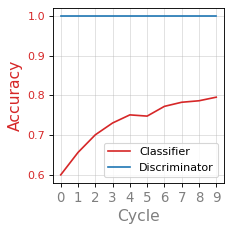

In [12]:
R.plot() 